# 需求分析

- 过去一个月，全国热点城市的房租如脱缰野马。一线的房租同比涨了近20%。一夜醒来，无产青年连一块立锥之地都悬了。  
从2018下半年开始，租金海啸汹汹来袭，资本狂欢，官方默然，房东纠结，租客尖叫。这不是一方的过错，而更像是一场  
全社会的“集体谋杀作品”。最令人不安的是，过去房地产的那套玩法和上涨逻辑，今天正在转移到房租上。
- 通过python获取某网站**杭州**的租房数据，来进行数据分析

# 页面分析

要爬取得字段
- 1.标题 title  
title=html.xpath('.//li/div[@class="info-panel"]/h2/a/@title')[i].replace(","," ")  
- 2.户型 room_type  
room_type=html.xpath('//div[@class="list-wrap"]//li//div[@class="where"]/span[@class="zone"]/span/text()')[i].replace("\xa0\xa0","")
- 3.面积 meters  
m=html.xpath('//div[@class="list-wrap"]//li//div[@class="where"]/span[@class="meters"]/text()')[i].replace("\xa0\xa0","")
- 4.建筑时间 time  
time=html.xpath('//div[@class="list-wrap"]//li//div[@class="con"]/text()[2]')[i]
- 5.所在楼层 floor  
floor=html.xpath('//div[@class="list-wrap"]//li//div[@class="con"]/text()[1]')[i]
- 6.价格 price  
price=html.xpath('//div[@class="list-wrap"]//li//div[@class="col-3"]/div[@class="price"]/span/text()')[i]
- 7.楼层总高 tatal_floor  
tatal_floor=re.findall('(\d+)',floor)[0]
- 8.更新时间 price_pre  
price_pre=html.xpath('//div[@class="price-pre"]/text()')[i][:-2]
- 9.具体位置 detail_place  
detail_place=re.findall("(\w+)租房",html.xpath('//div[@class="con"]/a/text()')[i])[0]

# 数据分析

## 数据获取

In [2]:
import requests
from  lxml import etree

In [3]:
def get_html(url):
    headers={
        "user-agent":"Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/68.0.3440.84 Safari/537.36"
    }
    r=requests.get(url,headers=headers)
    html=etree.HTML(r.text)
    for i in range(30):
        title=html.xpath('.//li/div[@class="info-panel"]/h2/a/@title')[i].replace(","," ")
        room_type=html.xpath('//div[@class="list-wrap"]//li//div[@class="where"]/span[@class="zone"]/span/text()')[i].replace("\xa0\xa0","")
        try:
            m=html.xpath('//div[@class="list-wrap"]//li//div[@class="where"]/span[@class="meters"]/text()')[i].replace("\xa0\xa0","")
            meters=re.findall('(\d+)',m)[0]
            meters=float(meters)
           
        except:
            meters=''
        meters=str(meters)
        time=html.xpath('//div[@class="list-wrap"]//li//div[@class="con"]/text()[2]')[i]
        floor=html.xpath('//div[@class="list-wrap"]//li//div[@class="con"]/text()[1]')[i]
        try:
            price=html.xpath('//div[@class="list-wrap"]//li//div[@class="col-3"]/div[@class="price"]/span/text()')[i]
        except:
            price=""
        tatal_floor=re.findall('(\d+)',floor)[0]
        floor = floor[:1]
        try:
            time=re.findall('(\d+)',time)[0]
        except:
            time=''
        price_pre=html.xpath('//div[@class="price-pre"]/text()')[i][:-2]
        price_pre=price_pre.replace(".",'-')
        detail_place=re.findall("(\w+)租房",html.xpath('//div[@class="con"]/a/text()')[i])[0]
        yield  title,detail_place,room_type,meters,time,floor,tatal_floor,price,price_pre

def main():
    for i in range(1,101):
        url= "https://hz.lianjia.com/zufang/pg%s/" % str(i)
        for i in get_html(url):
            with open("链家杭州租房.txt",'a',encoding='utf-8') as f:
                f.write(','.join(i)+'\n')
main()

In [4]:
import pandas as pd
f = open("./链家杭州租房.txt",'r',encoding="utf-8")
df=pd.read_csv(f,sep=',',header=None,names=["title","detail_place","room_type","meters","time","floor","tatal_floor","price","price_pre"])

## 数据处理

In [5]:
# 数据清洗-去除空值
df=df.dropna()
# 数据转化 数据类型转化
df.time=df.time.astype("object")

In [6]:
df.head()

,title,detail_place,room_type,meters,time,floor,tatal_floor,price,price_pre
0,天阳棕榈湾一期 4室2厅 5500元,良渚,4室2厅,174.0,2004,高,5,5500,2018-08-28
1,广厦天都城天星苑 3室2厅 2800元,星桥,3室2厅,83.0,2007,高,18,2800,2018-07-18
2,金都华府 三室精装 家电齐全 拎包入住,雄镇楼,3室2厅,135.0,2007,高,21,13000,2018-08-28
3,广厦天都城天水苑 3室2厅 3500元,星桥,3室2厅,129.0,2009,低,13,3500,2018-08-26
4,雅居乐国际花园 4室1厅 3500元,闲林,4室1厅,89.0,2016,中,33,3500,2018-08-25


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2752 entries, 0 to 2999
Data columns (total 9 columns):
title           2752 non-null object
detail_place    2752 non-null object
room_type       2752 non-null object
meters          2752 non-null float64
time            2752 non-null object
floor           2752 non-null object
tatal_floor     2752 non-null int64
price           2752 non-null int64
price_pre       2752 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 215.0+ KB


In [8]:
df.describe()

,meters,tatal_floor,price
count,2752.000000,2752.000000,2752.000000
mean,70.592297,16.511991,4302.032340
std,53.899467,9.904260,3424.092159
min,4.000000,1.000000,790.000000
25%,30.000000,7.000000,2290.000000
50%,67.000000,16.000000,3600.000000
75%,89.000000,24.000000,5000.000000
max,700.000000,53.000000,55000.000000


数据共有2780条，9个维度，由上图可以看出  
- **杭州**房源的**平均房价为4111/月，中位数3500/月**  
- 一半房源的价格在3500/月一下  
- 所有房源的价格区间在[789-68000],价格差异较大


## 数据可视化

### 杭州主要区域房源数量及均价

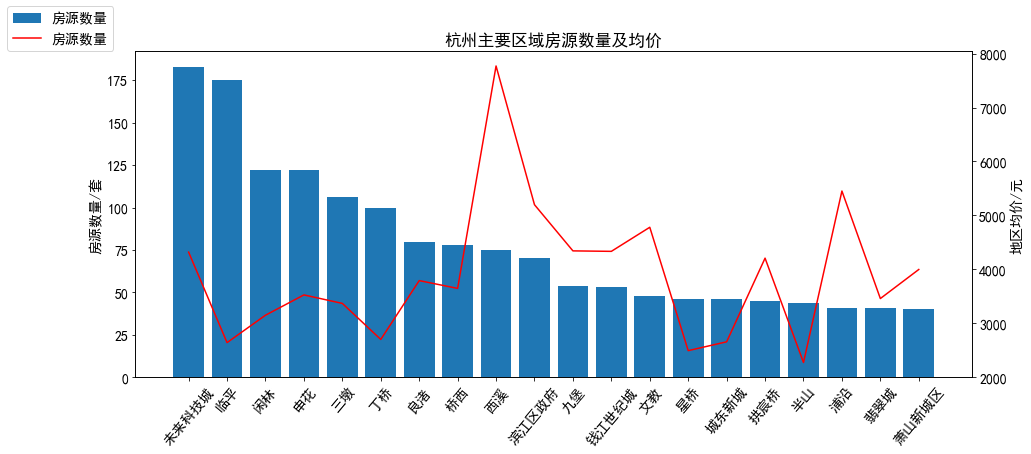

In [11]:
# 根据地区分组
detail_place=df.groupby("detail_place")
house_com=detail_place.price.agg(['mean','count'])
# 重置索引，根据count排序取前20项
house_com.reset_index(inplace=True)
house_com_main=house_com.sort_values('count',ascending=False).head(20)

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rcParams["font.family"]="sans-serif"
mpl.rcParams["font.size"]=14
mpl.rcParams["font.sans-serif"]=u'SimHei'


x=house_com_main.detail_place.values
y1=house_com_main['count'].values
y2=house_com_main['mean'].values

fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(111)
ax1.bar(x, y1,label="房源数量")
ax1.set_ylabel('房源数量/套')
# ax1.set_title("杭州主要区域房源数量及均价")
# ax1.legend(["房源数量"])

plt.xticks(rotation=50)
ax2 = ax1.twinx()  # this is the important function
ax2.plot(x, y2, 'r',label="房源数量")
ax2.set_ylabel("地区均价/元")
fig.legend(loc='upper left')
plt.title("杭州主要区域房源数量及均价")
plt.show()




- 由上图可以看出，最近杭州各城区的租房价格主要在4000以下，其中最够为钱江新城,但房租的价格受房屋位置、面积、楼层、朝向都  
对房租有较大的的影响，因此还需进一步的分析

### 价格区间与房源数量的关系

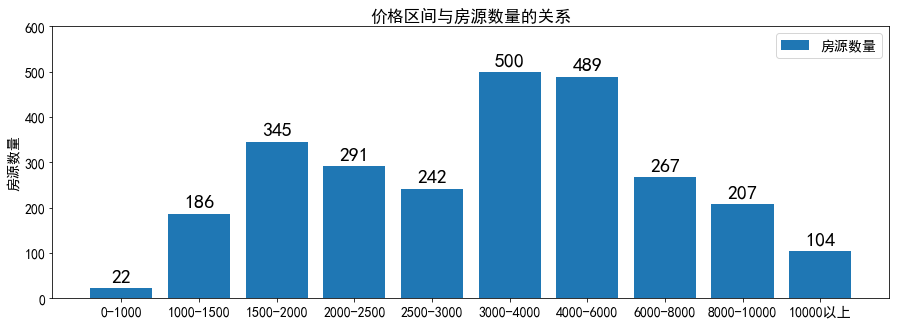

In [12]:
price_info=df["price"]
bins = [0,1000,1500,2000,2500,3000,4000,5000,6000,8000,10000]
labels= ["0-1000",'1000-1500','1500-2000','2000-2500','2500-3000','3000-4000','4000-6000','6000-8000','8000-10000','10000以上']
price_stage=pd.cut(price_info,bins=bins,labels=labels).value_counts().sort_index()
plt.figure(figsize=(15,5))
plt.bar(price_stage.index, price_stage.values,label="房源数量")
plt.ylim(0,600)
plt.ylabel('房源数量')
for a,b in zip(price_stage.index,price_stage.values):
    plt.text(a, b+10, '%.0f' % b, ha='center', va= 'bottom',fontsize=20)
plt.legend()
plt.title("价格区间与房源数量的关系")
plt.show()


- 由上图可以看出均价在3000左右的房源较多，价格在1000以下的房源很少

### 房屋面积的分布

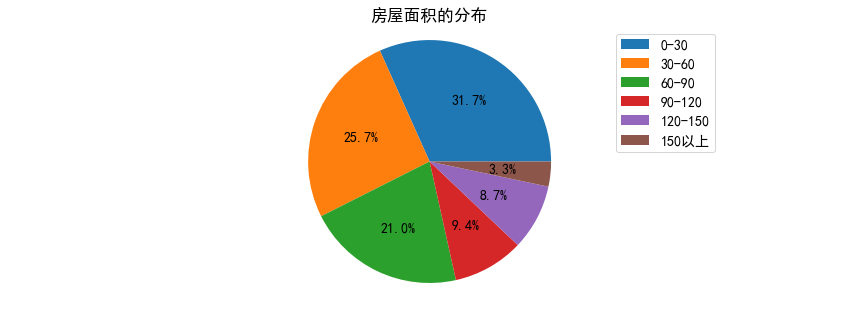

In [13]:
meters_info=df["meters"]
bins = [0,30,60,90,120,150,200]
labels= ["0-30",'30-60','60-90','90-120','120-150','150以上']
meters_stage=pd.cut(meters_info,bins=bins,labels=labels)

plt.figure(figsize=(15,5))
plt.pie(meters_stage.value_counts().values,autopct='%1.1f%%',shadow=False)
plt.axis('equal')
plt.legend(loc="best", labels=labels,bbox_to_anchor=(0.85,1))
plt.title("房屋面积的分布")
plt.show()

- 由上图可看出，大约80%的房源的面积集中在0-90平方米之间，大面积的房屋很少

### 房屋面积与价格

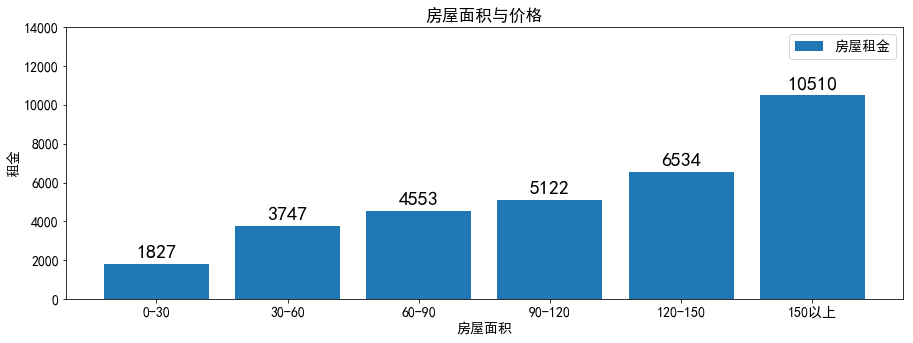

In [14]:
meters_info=df["meters"]
bins = [0,30,60,90,120,150,200]
labels= ["0-30",'30-60','60-90','90-120','120-150','150以上']

df["meters_level"]=pd.cut(meters_info,bins=bins,labels=labels)
meters_data=df[["meters_level","price"]]
peices=meters_data.groupby("meters_level").mean().reset_index()
plt.figure(figsize=(15,5))
plt.bar(peices.meters_level, peices.price,label="房屋租金")
plt.ylabel('租金')
plt.ylim(0,14000)
plt.xlabel('房屋面积')
for a,b in zip(peices.meters_level,peices.price):
    plt.text(a, b+200, '%.0f' % b, ha='center', va= 'bottom',fontsize=20)
plt.legend()
plt.title("房屋面积与价格")
plt.show()

- 果然房子越大租金越贵

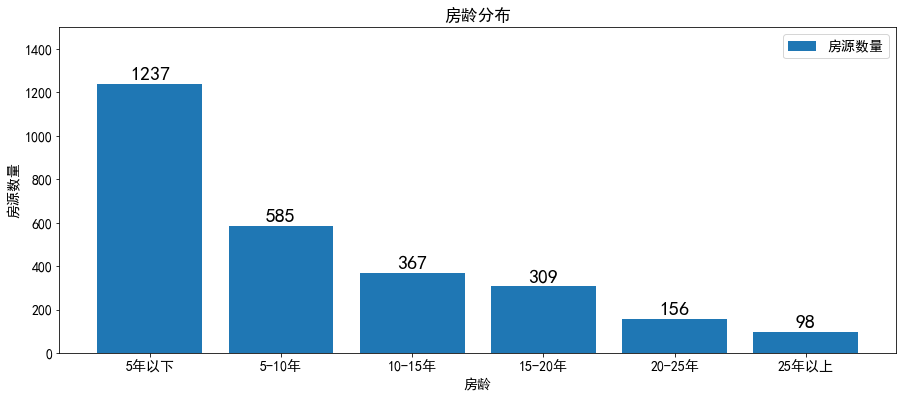

In [15]:
df["time_interval"]=2018-df.time                            
bins = [0,5,10,15,20,25,30]
labels= ["5年以下",'5-10年','10-15年','15-20年','20-25年','25年以上']
df["interval"]=pd.cut(df["time_interval"],bins=bins,labels=labels)
data=df[["interval"]].fillna("5年以下").reset_index()
time_data=data.groupby('interval').count()

plt.figure(figsize=(15,6))
plt.bar(labels,time_data.values.ravel(),label="房源数量")
plt.ylabel('房源数量')
plt.ylim(0,1500)

plt.xlabel('房龄')
plt.legend()
for a,b in zip(labels,time_data.values.ravel()):
    plt.text(a, b+10, '%.0f' % b, ha='center', va= 'bottom',fontsize=20)
plt.title("房龄分布")
plt.show()

- 房屋年龄大多数集中在五年以下，是否跟长租平台自如，青客进入杭州有关

# 总结

自如举例，表面上看跟中介公司没啥两样，收了各种散盘，然后集中装修、出租、管理，因为运营成本和住房质量提高，房租肯定有所上涨。  
但更关键的事情在背后。自如把项目打包起来搞起了资产证券化，以租金收益权为基础资产做担保，投放到金融市场上发行国内首单租房市  
场消费分期类ABS，让各路资金来认购，每年给大家搞点分红。  
大量资本都在赌租房这个风口，而前期谁的规模越大、资源越多，以后的定价权就越大，利润空间就越不可想象。  
这次一共从链家网上爬取14038条数据，而那就是大概一周前，8月17日北京住建委约谈了几家中介公司。最终的结果是自如、  
相寓和蛋壳承诺将拿出12万间房子投入市场其中，自如将拿出8万间（链家、自如、贝壳找房，他们的实际控制人是同一个人--链家老板左晖。